In [1]:
# Import packages
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sci-Kit Learn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [235]:
def feature_importance(cluster_data, league_data):
    """
    takes reduced data,
    performs Principal Component Analysis,
    returns feature importance dataframe
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)

    pca = PCA(n_components=2)
    PCA_reduced_df = pca.fit(scaled_data).transform(scaled_data)
    
    

    features = pd.DataFrame(zip(cluster_data.columns, pca.components_[0], np.mean(cluster_data), np.mean(league_data)),
        columns=['Feature', 'Importance', 'Cluster Average', 'League Average']).sort_values('Importance', ascending=False).head(20)

    return features

In [2]:
import sqlite3

pd.set_option('display.max_columns', 500)

conn = sqlite3.connect('AI_SCOUT.db')

In [180]:
data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    ORDER BY "Raptor+/-" DESC
    """, conn)
data.head(30)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,curryst01,Stephen Curry,2016,27,PG,GSW,10.7,GSW,79,2700,67.9,34.2,31.9,66.9,7.1,5.8,2.5,3.5,11.1,2.8,13.9,23.7,20.2,22.9,32.6,33.7,12.9,2.9,13.6,8.6,3.0,0.4,124.6,31.6,102.5,56.6,45.4,90.8,55.4,25.0,0
1,paulch01,Chris Paul,2009,23,PG,NOH,1.8,NOH,78,3002,76.0,38.5,24.3,59.9,11.8,5.9,3.1,3.2,8.7,3.9,12.7,23.6,21.9,24.2,27.5,54.5,13.5,2.8,14.6,8.7,3.9,0.3,124.4,30.0,103.1,52.5,36.4,86.8,14.0,41.8,7
2,jamesle01,LeBron James,2009,24,SF,CLE,10.0,CLE,81,3054,77.2,37.7,30.6,59.1,7.8,8.1,3.1,3.2,8.7,3.3,11.9,22.8,23.1,24.8,33.8,38.0,11.0,4.3,19.0,11.9,2.4,2.4,121.7,34.2,99.0,53.5,34.4,78.0,23.8,47.2,0
3,curryst01,Stephen Curry,2015,26,PG,GSW,10.2,GSW,80,2613,66.2,32.7,26.6,63.8,8.7,4.8,2.5,3.5,9.5,2.3,11.7,19.9,18.9,21.4,28.9,38.6,14.3,2.4,11.4,7.0,3.0,0.5,121.9,29.3,101.1,52.8,44.3,91.4,48.2,25.1,2
4,jamesle01,LeBron James,2010,25,SF,CLE,7.1,CLE,76,2966,75.0,39.0,30.0,60.4,8.6,7.4,2.7,3.5,9.5,2.2,11.7,21.8,22.4,23.6,33.5,41.8,12.3,3.0,18.5,11.1,2.2,2.0,120.9,34.0,101.7,56.0,33.3,76.7,25.3,50.6,2
5,paulch01,Chris Paul,2014,28,PG,LAC,7.2,LAC,62,2171,55.0,35.0,20.5,58.0,11.5,4.6,2.7,2.5,7.1,3.9,11.0,15.3,18.2,19.8,23.7,48.9,12.4,2.0,11.4,6.9,3.5,0.1,124.6,26.0,103.2,49.8,36.8,85.5,24.4,39.7,7
6,hardeja01,James Harden,2019,29,PG,HOU,4.8,HOU,78,2867,72.3,36.8,36.2,61.6,7.5,6.6,2.8,5.0,9.8,1.1,10.9,20.1,20.2,19.6,40.5,39.5,14.5,2.5,17.8,10.0,2.7,1.7,118.3,40.7,108.0,52.8,36.8,87.9,53.9,44.9,0
7,paulch01,Chris Paul,2015,29,PG,LAC,6.9,LAC,82,2857,72.4,34.8,20.8,59.6,11.2,5.0,2.3,2.5,8.5,2.1,10.6,19.4,18.2,19.7,23.7,47.4,12.7,2.1,12.5,7.4,2.8,0.4,125.6,25.9,104.9,52.3,39.8,90.0,29.8,27.4,7
8,hardeja01,James Harden,2018,28,SG,HOU,8.7,HOU,72,2551,64.6,35.4,31.7,61.9,9.1,5.6,2.5,4.6,9.1,1.2,10.3,17.0,19.7,19.7,36.1,45.1,15.1,1.8,15.2,8.6,2.4,1.7,120.4,37.2,104.9,53.1,36.7,85.8,49.8,50.2,2
9,leonaka01,Kawhi Leonard,2016,24,SF,SAS,11.3,SAS,72,2380,60.4,33.1,24.6,61.6,3.0,8.0,3.2,1.7,5.0,5.1,10.1,15.5,17.4,20.8,25.8,13.0,7.8,4.7,18.4,11.8,2.8,2.3,121.4,24.3,95.9,52.8,44.3,87.4,26.7,30.6,3


In [181]:
top100 = data.head(100)

In [185]:
top100['Cluster'].value_counts()

0    24
2    20
7    15
3    10
1    10
5     9
6     7
4     5
Name: Cluster, dtype: int64

In [236]:
data.loc[data['name_common']=='Damian Lillard']

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
58,lillada01,Damian Lillard,2018,27,PG,POR,2.7,POR,73,2670,67.6,36.6,27.4,59.4,6.7,4.5,1.5,2.9,6.6,0.3,6.9,13.3,17.0,17.7,30.6,30.9,11.1,2.6,10.6,6.6,1.4,0.8,120.1,30.9,108.8,50.1,36.1,91.6,44.5,38.0,2
74,lillada01,Damian Lillard,2019,28,PG,POR,4.2,POR,80,2838,71.5,35.5,26.5,58.8,7.1,4.7,1.6,2.7,6.8,-0.4,6.4,13.3,15.7,15.8,29.3,30.6,10.8,2.6,11.1,7.0,1.5,1.0,121.4,29.5,112.0,49.9,36.9,91.2,41.9,33.5,2
95,lillada01,Damian Lillard,2020,29,PG,POR,-1.6,POR,58,2140,67.3,36.9,28.0,61.9,7.6,4.2,1.3,2.8,7.9,-2.0,5.9,9.6,16.9,17.3,30.2,34.1,11.0,1.5,10.5,6.1,1.3,0.8,124.6,30.8,116.4,51.8,39.4,88.8,49.3,37.7,2
243,lillada01,Damian Lillard,2017,26,PG,POR,-0.5,POR,75,2694,67.6,35.9,28.0,58.6,6.1,5.1,1.2,2.7,6.2,-2.0,4.2,9.5,16.3,15.8,31.5,28.7,10.2,1.9,13.3,7.6,1.3,0.6,117.8,31.1,112.8,49.2,37.0,89.5,38.9,36.6,0
481,lillada01,Damian Lillard,2016,25,PG,POR,0.9,POR,75,2676,67.6,35.7,26.3,56.0,7.2,4.2,1.3,3.4,5.0,-2.1,2.9,7.9,14.9,14.0,31.3,33.6,12.6,1.8,10.4,6.1,1.2,0.8,113.1,31.4,110.5,45.0,37.5,89.2,41.4,31.5,2
536,lillada01,Damian Lillard,2015,24,PG,POR,4.5,POR,82,2925,73.7,35.7,22.5,56.0,6.6,4.9,1.5,2.9,4.0,-1.3,2.7,8.1,14.0,13.9,26.9,29.0,12.6,1.8,11.8,6.9,1.7,0.5,112.2,27.2,104.9,50.0,34.3,86.4,42.1,29.3,2
746,lillada01,Damian Lillard,2014,23,PG,POR,4.2,POR,82,2937,74.0,35.8,21.9,56.8,5.9,3.7,1.1,2.5,3.6,-1.5,2.1,7.4,12.0,11.9,25.0,25.1,11.5,1.3,9.2,5.3,1.1,0.5,115.8,24.8,110.1,44.7,39.4,87.1,42.5,32.7,2
935,lillada01,Damian Lillard,2013,22,PG,POR,-3.4,POR,82,3167,79.7,38.6,19.4,54.6,6.6,3.2,1.2,3.0,3.0,-1.4,1.6,7.0,10.8,9.9,24.2,28.8,14.5,1.5,8.0,4.7,1.2,0.5,108.1,24.7,112.5,46.9,36.8,84.4,39.1,24.9,2


In [153]:
data.loc[data['player_id']=='jamesle01']

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
2,jamesle01,LeBron James,2009,24,SF,CLE,10.0,CLE,81,3054,77.2,37.7,30.6,59.1,7.8,8.1,3.1,3.2,8.7,3.3,11.9,22.8,23.1,24.8,33.8,38.0,11.0,4.3,19.0,11.9,2.4,2.4,121.7,34.2,99.0,53.5,34.4,78.0,23.8,47.2,0
4,jamesle01,LeBron James,2010,25,SF,CLE,7.1,CLE,76,2966,75.0,39.0,30.0,60.4,8.6,7.4,2.7,3.5,9.5,2.2,11.7,21.8,22.4,23.6,33.5,41.8,12.3,3.0,18.5,11.1,2.2,2.0,120.9,34.0,101.7,56.0,33.3,76.7,25.3,50.6,2
11,jamesle01,LeBron James,2013,28,PF,MIA,8.6,MIA,76,2877,72.4,37.9,28.1,64.0,7.6,8.4,2.7,3.1,8.8,1.1,9.9,18.4,22.7,24.1,30.2,36.4,12.4,4.4,20.8,13.1,2.4,1.9,124.6,30.5,100.9,60.2,40.6,75.3,18.8,39.5,0
14,jamesle01,LeBron James,2012,27,SF,MIA,6.5,MIA,62,2326,72.5,37.5,28.6,60.5,6.6,8.3,2.8,3.6,7.6,2.1,9.6,14.6,23.0,24.6,32.0,33.6,13.3,5.0,19.7,12.6,2.6,1.7,117.9,32.0,97.3,55.6,36.2,77.1,12.7,42.9,0
29,jamesle01,LeBron James,2008,23,SF,CLE,-0.4,CLE,75,3027,76.2,40.4,29.7,56.8,7.1,7.8,2.9,3.4,7.1,1.5,8.6,17.5,20.6,21.8,33.5,37.3,11.4,4.9,17.8,11.1,2.4,2.1,116.3,33.6,103.6,53.1,31.5,71.2,21.9,47.0,0
37,jamesle01,LeBron James,2011,26,SF,MIA,8.2,MIA,79,3063,77.4,38.8,27.3,59.4,7.2,7.6,2.2,3.7,6.4,1.5,7.8,16.5,20.2,20.2,31.5,34.9,13.8,3.3,18.7,11.4,2.1,1.3,116.2,31.9,101.5,55.2,33.0,75.9,18.8,44.6,0
39,jamesle01,LeBron James,2020,35,PG,LAL,7.3,LAL,60,2094,69.0,34.9,26.3,58.2,10.8,8.1,1.8,4.1,6.7,1.0,7.7,11.2,20.1,19.0,31.6,49.7,15.3,3.1,21.0,12.3,1.7,1.3,116.6,33.4,105.4,57.0,34.9,69.7,32.4,29.2,7
43,jamesle01,LeBron James,2016,31,SF,CLE,6.4,CLE,76,2709,68.2,35.6,27.4,58.8,7.3,8.1,2.2,3.5,6.1,1.4,7.5,14.2,19.8,19.9,31.4,36.0,13.2,4.7,18.8,11.8,2.0,1.5,116.2,31.9,102.6,57.3,30.9,73.1,19.9,34.7,0
69,jamesle01,LeBron James,2017,32,SF,CLE,3.3,CLE,74,2794,70.3,37.8,26.2,61.9,8.7,8.6,1.8,4.1,6.2,0.4,6.6,13.4,18.5,17.4,30.0,41.3,16.1,4.0,20.7,12.6,1.6,1.3,118.9,31.5,108.4,61.1,36.3,67.4,25.4,39.5,2
108,jamesle01,LeBron James,2019,34,SF,LAL,-1.7,LAL,55,1937,49.0,35.2,27.1,58.8,8.2,8.4,1.9,3.5,5.4,0.2,5.6,8.3,19.1,18.6,31.6,39.4,13.3,3.1,21.3,12.4,1.7,1.4,114.3,32.2,107.9,58.2,33.9,66.5,29.9,38.2,2


In [203]:
data.loc[data['player_id']=='leonaka01']

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
9,leonaka01,Kawhi Leonard,2016,24,SF,SAS,11.3,SAS,72,2380,60.4,33.1,24.6,61.6,3.0,8.0,3.2,1.7,5.0,5.1,10.1,15.5,17.4,20.8,25.8,13.0,7.8,4.7,18.4,11.8,2.8,2.3,121.4,24.3,95.9,52.8,44.3,87.4,26.7,30.6,3
17,leonaka01,Kawhi Leonard,2020,28,SF,LAC,6.4,LAC,51,1643,53.2,32.2,29.5,58.5,5.5,8.0,2.6,3.0,5.9,3.4,9.3,10.1,19.3,19.1,33.2,27.0,10.7,3.3,19.7,11.7,2.6,1.7,116.3,32.4,103.7,51.0,36.6,88.9,28.7,34.4,0
24,leonaka01,Kawhi Leonard,2015,23,SF,SAS,6.5,SAS,64,2033,50.9,31.8,20.0,56.7,3.0,8.7,3.7,1.8,3.7,5.2,8.9,12.1,15.2,17.4,23.0,13.0,9.4,4.8,20.6,12.9,3.7,1.8,112.6,22.2,96.4,51.9,34.9,80.2,23.4,30.7,6
31,leonaka01,Kawhi Leonard,2017,25,SF,SAS,7.6,SAS,74,2474,62.5,33.4,29.2,61.0,4.0,6.6,2.9,2.4,6.6,1.7,8.3,13.9,18.4,20.3,31.1,18.9,9.1,3.7,15.7,9.8,2.7,1.8,120.6,29.6,101.4,52.9,38.0,88.0,29.5,40.6,6
63,leonaka01,Kawhi Leonard,2014,22,SF,SAS,8.1,SAS,66,1923,48.7,29.1,16.6,60.2,2.6,8.1,3.2,1.6,1.7,5.0,6.7,9.3,13.2,15.4,18.3,10.4,10.3,4.6,18.9,12.1,3.0,1.9,116.4,17.7,98.2,57.9,37.9,80.2,28.2,19.5,3
120,leonaka01,Kawhi Leonard,2019,27,SF,TOR,6.0,TOR,60,2040,51.3,34.0,28.1,60.6,3.5,7.7,2.3,2.1,4.7,0.7,5.4,8.5,17.8,18.5,30.3,16.4,8.4,4.2,18.6,11.6,2.5,1.0,119.5,28.7,105.2,54.2,37.1,85.4,26.7,37.7,3
289,leonaka01,Kawhi Leonard,2013,21,SF,SAS,6.7,SAS,58,1810,45.5,31.2,14.5,59.2,2.0,7.3,2.7,1.3,1.0,2.9,3.9,6.1,11.5,13.5,16.4,7.7,9.6,4.3,17.1,11.1,2.7,1.3,114.4,15.7,99.4,55.4,37.4,82.5,33.1,24.0,3
469,leonaka01,Kawhi Leonard,2012,20,SF,SAS,7.7,SAS,64,1534,48.1,24.0,12.8,57.3,1.8,8.3,2.8,1.1,1.6,1.4,3.0,4.5,10.8,13.8,14.5,6.6,9.0,7.9,16.4,12.2,2.9,1.1,118.9,14.5,100.5,53.6,37.6,77.3,27.0,21.8,3


# C0

In [162]:
C0_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=0
    ORDER BY "Raptor+/-" DESC
    """, conn)
C0_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,curryst01,Stephen Curry,2016,27,PG,GSW,10.7,GSW,79,2700,67.9,34.2,31.9,66.9,7.1,5.8,2.5,3.5,11.1,2.8,13.9,23.7,20.2,22.9,32.6,33.7,12.9,2.9,13.6,8.6,3.0,0.4,124.6,31.6,102.5,56.6,45.4,90.8,55.4,25.0,0
1,jamesle01,LeBron James,2009,24,SF,CLE,10.0,CLE,81,3054,77.2,37.7,30.6,59.1,7.8,8.1,3.1,3.2,8.7,3.3,11.9,22.8,23.1,24.8,33.8,38.0,11.0,4.3,19.0,11.9,2.4,2.4,121.7,34.2,99.0,53.5,34.4,78.0,23.8,47.2,0
2,hardeja01,James Harden,2019,29,PG,HOU,4.8,HOU,78,2867,72.3,36.8,36.2,61.6,7.5,6.6,2.8,5.0,9.8,1.1,10.9,20.1,20.2,19.6,40.5,39.5,14.5,2.5,17.8,10.0,2.7,1.7,118.3,40.7,108.0,52.8,36.8,87.9,53.9,44.9,0
3,jamesle01,LeBron James,2013,28,PF,MIA,8.6,MIA,76,2877,72.4,37.9,28.1,64.0,7.6,8.4,2.7,3.1,8.8,1.1,9.9,18.4,22.7,24.1,30.2,36.4,12.4,4.4,20.8,13.1,2.4,1.9,124.6,30.5,100.9,60.2,40.6,75.3,18.8,39.5,0
4,jamesle01,LeBron James,2012,27,SF,MIA,6.5,MIA,62,2326,72.5,37.5,28.6,60.5,6.6,8.3,2.8,3.6,7.6,2.1,9.6,14.6,23.0,24.6,32.0,33.6,13.3,5.0,19.7,12.6,2.6,1.7,117.9,32.0,97.3,55.6,36.2,77.1,12.7,42.9,0
5,hardeja01,James Harden,2020,30,SG,HOU,3.6,HOU,61,2241,72.6,36.7,32.6,61.6,7.0,6.0,2.5,4.2,8.0,1.5,9.5,13.9,18.1,18.1,36.4,34.4,13.8,3.0,15.3,9.1,2.2,2.0,119.7,36.8,109.0,53.8,35.2,86.1,55.5,51.9,0
6,leonaka01,Kawhi Leonard,2020,28,SF,LAC,6.4,LAC,51,1643,53.2,32.2,29.5,58.5,5.5,8.0,2.6,3.0,5.9,3.4,9.3,10.1,19.3,19.1,33.2,27.0,10.7,3.3,19.7,11.7,2.6,1.7,116.3,32.4,103.7,51.0,36.6,88.9,28.7,34.4,0
7,ginobma01,Manu Ginobili,2008,30,SG,SAS,5.4,SAS,74,2299,58.3,31.1,25.4,61.2,5.9,6.2,2.5,3.5,5.9,3.1,9.0,13.8,17.0,19.0,28.7,26.4,14.5,3.3,14.7,9.1,2.6,1.1,115.6,28.7,99.9,49.9,40.1,86.0,39.5,44.9,0
8,jamesle01,LeBron James,2008,23,SF,CLE,-0.4,CLE,75,3027,76.2,40.4,29.7,56.8,7.1,7.8,2.9,3.4,7.1,1.5,8.6,17.5,20.6,21.8,33.5,37.3,11.4,4.9,17.8,11.1,2.4,2.1,116.3,33.6,103.6,53.1,31.5,71.2,21.9,47.0,0
9,curryst01,Stephen Curry,2017,28,PG,GSW,11.6,GSW,79,2638,66.7,33.4,27.3,62.4,7.2,4.8,2.2,3.3,8.7,-0.2,8.4,15.6,16.0,17.2,30.1,31.2,13.0,2.7,11.4,7.3,2.6,0.5,118.7,29.7,104.9,53.7,41.1,89.8,54.7,25.1,0


In [233]:
cluster_data = C0.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster', 'tmRtg'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster', 'tmRtg'], axis=1)

fi0 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
fi0

,Feature,Importance,Cluster Average,League Average
0,ORB%,0.235967,5.391452,5.185821
1,BLK%,0.221558,1.936228,1.665926
2,R/36,0.211423,7.454138,6.796234
3,TRB%,0.210913,11.034328,10.058575
4,Raptor D,0.201670,1.574898,-0.062228
5,DRB%,0.175019,16.537449,14.929310
6,SB/36,0.170186,2.351832,1.963067
7,2P%,0.146134,51.716825,48.971892
8,ORtg,0.037463,114.543555,107.406624
9,TS%,0.032698,57.516418,53.956942


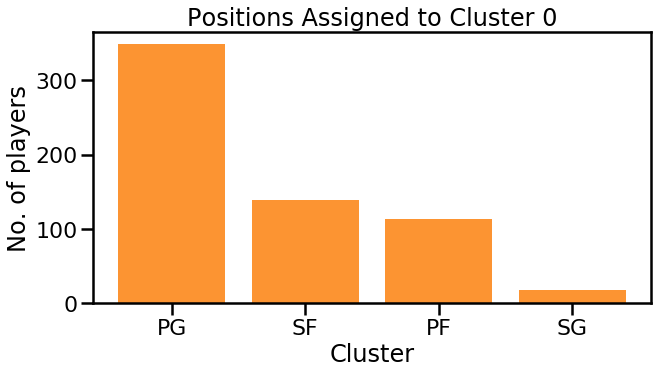

In [164]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C0_data['pos'].unique(), C0_data['pos'].value_counts(), color ='#fc9432') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 0") 
plt.show() 

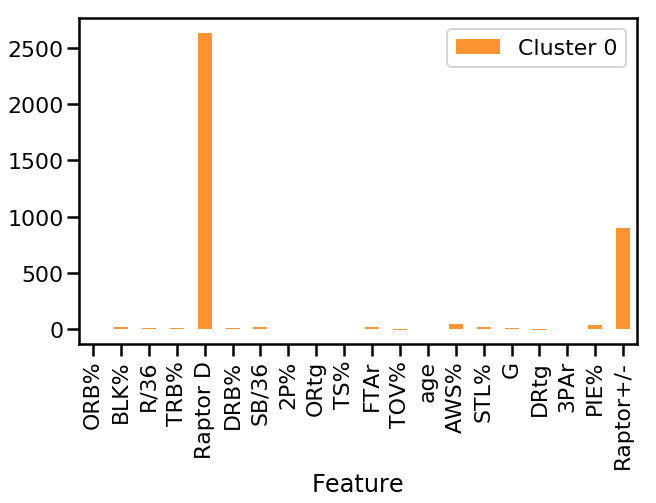

In [234]:
bar_features(fi0, 'Cluster 0', '#fc9432')

# C1

Stretch 5/4, Offensive Big Men

In [133]:
# Offensive Big Men
C1_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=1
    ORDER BY "Raptor+/-" DESC
    """, conn)
C1_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,antetgi01,Giannis Antetokounmpo,2020,25,PF,MIL,10.7,MIL,57,1763,56.3,30.9,32.9,60.8,6.4,15.2,2.3,4.1,5.3,4.0,9.2,11.0,23.4,22.8,37.4,33.9,13.1,7.8,34.5,22.0,1.5,2.9,116.2,37.3,96.2,62.2,30.6,63.3,23.8,50.0,1
1,davisan02,Anthony Davis,2015,21,PF,NOP,0.9,NOH,68,2455,62.1,36.1,26.6,59.1,2.4,11.2,4.8,1.5,4.3,4.5,8.8,14.5,19.9,22.2,27.8,11.6,6.3,8.0,24.1,16.1,2.1,6.2,122.1,26.5,100.2,54.0,8.3,80.5,1.0,38.4,1
2,garneke01,Kevin Garnett,2008,31,PF,BOS,11.2,BOS,71,2328,58.9,32.8,22.7,58.8,4.2,11.1,3.2,2.3,3.0,5.2,8.2,12.9,20.7,22.3,25.5,19.9,10.8,7.3,25.1,16.8,2.3,3.1,117.7,25.0,93.8,54.5,0.0,80.1,1.1,33.9,1
3,jokicni01,Nikola Joki?,2019,23,C,DEN,4.0,DEN,80,2504,63.5,31.3,23.6,58.9,8.5,12.7,2.4,3.6,5.6,1.8,7.4,13.0,19.2,19.0,27.4,37.0,15.4,9.8,27.6,18.7,2.1,1.9,119.0,29.4,104.7,56.9,30.7,82.1,22.4,29.2,1
4,davisan02,Anthony Davis,2019,25,C,NOP,-1.3,NOH,56,1850,46.8,33.0,27.4,59.7,4.1,12.7,4.2,2.1,4.1,3.3,7.4,9.6,19.7,21.0,29.5,19.0,8.4,9.9,27.5,18.8,2.2,6.0,122.0,29.0,105.0,54.7,33.1,79.4,14.1,42.2,1
5,jokicni01,Nikola Jokic,2017,21,C,DEN,0.5,DEN,73,2038,51.6,27.9,21.9,64.0,6.5,12.9,2.1,3.1,6.4,0.9,7.3,10.6,17.7,18.1,23.5,28.8,15.2,11.6,27.2,19.5,1.5,2.1,125.7,24.9,109.4,62.8,32.4,82.5,16.3,26.7,1
6,antetgi01,Giannis Antetokounmpo,2019,24,PF,MIL,8.5,MIL,72,2358,59.6,32.8,29.5,64.4,6.3,13.3,3.0,4.0,4.2,2.6,6.8,11.6,21.7,21.2,32.3,30.3,14.8,7.3,30.0,19.3,1.8,3.9,121.2,32.7,99.3,64.1,25.6,72.9,16.3,55.0,1
7,davisan02,Anthony Davis,2020,26,PF,LAL,7.3,LAL,55,1889,62.3,34.3,27.7,61.4,3.2,9.8,4.1,2.6,2.3,3.7,6.0,8.5,18.8,20.0,29.7,14.6,10.1,7.3,22.1,14.9,2.1,6.2,121.2,28.7,100.8,55.4,33.5,84.5,19.5,46.0,1
8,adamsst01,Steven Adams,2016,22,C,OKC,7.5,OKC,80,2014,50.8,25.2,11.8,62.1,1.1,9.9,2.4,1.6,0.7,5.3,6.0,8.9,8.7,10.8,12.6,4.3,14.1,12.5,16.1,14.4,1.0,3.3,123.4,13.4,105.3,61.3,0.0,58.2,0.0,46.0,1
9,noahjo01,Joakim Noah,2014,28,C,CHI,2.0,CHI,80,2820,70.7,35.3,14.3,53.1,6.1,12.7,3.1,2.7,1.5,4.5,5.9,12.5,16.0,18.2,18.7,26.4,17.0,11.6,24.5,18.2,1.9,3.3,111.0,20.6,95.8,47.6,0.0,73.7,0.3,41.9,1


In [135]:
cluster_data = C1_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.299863,10.015980,9.413770
1,AWS%,0.276706,10.655684,9.525522
2,Raptor WAR,0.260462,1.682702,2.342015
3,Raptor O,0.254611,-1.608731,-0.437636
4,MPG,0.247865,20.999835,23.706443
5,P/36,0.245853,14.784349,15.303426
6,Raptor+/-,0.242227,-1.055684,-0.499660
7,MP%,0.239669,35.605437,40.354628
8,Min,0.235806,1372.629325,1551.274728
9,AST%,0.230306,9.098353,13.661025


In [197]:
cluster_data = C1_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

fi1 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
fi1

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.299863,10.015980,9.413770
1,AWS%,0.276706,10.655684,9.525522
2,Raptor WAR,0.260462,1.682702,2.342015
3,Raptor O,0.254611,-1.608731,-0.437636
4,MPG,0.247865,20.999835,23.706443
5,P/36,0.245853,14.784349,15.303426
6,Raptor+/-,0.242227,-1.055684,-0.499660
7,MP%,0.239669,35.605437,40.354628
8,Min,0.235806,1372.629325,1551.274728
9,AST%,0.230306,9.098353,13.661025


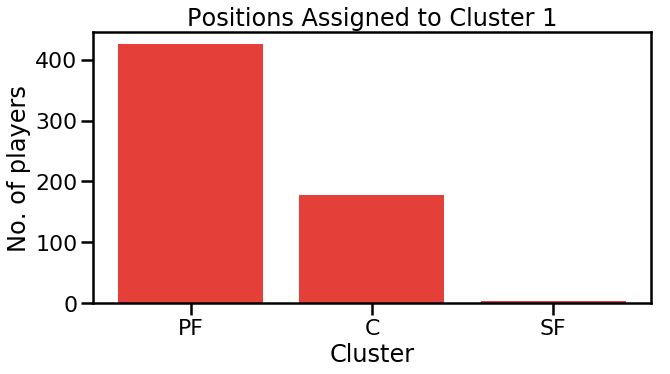

In [136]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C1_data['pos'].unique(), C1_data['pos'].value_counts(), color ='#e44039') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 1") 
plt.show() 

In [166]:
data.loc[data['player_id']=='duncati01']

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
99,duncati01,Tim Duncan,2010,33,C,SAS,5.5,SAS,78,2438,61.6,31.3,22.5,56.0,4.0,12.7,2.6,2.3,1.8,4.0,5.9,10.6,18.3,19.4,26.0,17.8,10.1,10.8,26.8,18.9,1.0,3.5,115.7,26.2,100.9,52.2,18.2,72.5,1.0,34.6,5
135,duncati01,Tim Duncan,2008,31,C,SAS,5.4,SAS,78,2651,67.2,34.0,23.1,54.6,3.3,13.5,3.2,2.7,1.2,4.1,5.3,10.8,18.1,19.0,28.2,15.7,11.4,10.7,28.3,19.6,1.1,4.3,109.6,28.3,96.6,49.8,0.0,73.0,0.3,39.3,5
160,duncati01,Tim Duncan,2016,39,C,SAS,11.3,SAS,61,1536,39.0,25.2,13.0,52.3,4.1,11.2,3.1,2.2,-0.3,5.3,5.0,6.1,12.3,13.0,17.6,15.3,15.3,8.8,23.8,16.6,1.6,3.9,107.2,18.7,95.7,49.0,0.0,70.2,0.5,29.7,1
209,duncati01,Tim Duncan,2013,36,C,SAS,6.7,SAS,69,2078,52.3,30.1,22.6,55.4,3.4,12.6,4.3,2.7,0.0,4.5,4.5,7.6,18.0,17.6,27.8,15.5,11.7,7.3,29.6,19.1,1.2,6.4,107.2,27.2,95.0,50.4,28.6,81.7,0.7,30.7,5
210,duncati01,Tim Duncan,2012,35,C,SAS,7.7,SAS,58,1634,51.3,28.2,21.2,53.1,3.1,12.3,3.0,2.3,0.2,4.3,4.5,6.0,15.9,15.2,26.2,13.5,10.3,7.9,28.2,18.3,1.2,3.9,107.9,25.7,98.6,49.5,0.0,69.5,0.5,34.0,1
224,duncati01,Tim Duncan,2011,34,C,SAS,6.2,SAS,76,2156,54.5,28.4,18.5,53.7,3.7,12.3,3.5,2.2,0.0,4.4,4.4,7.8,15.8,16.3,22.9,15.7,11.4,9.3,26.8,18.3,1.2,4.8,110.9,23.2,100.4,50.2,0.0,71.6,0.5,30.7,5
279,duncati01,Tim Duncan,2009,32,C,SAS,4.2,SAS,75,2524,63.4,33.7,23.4,54.9,4.3,12.9,2.6,2.7,0.5,3.5,4.0,8.6,17.6,17.9,28.5,19.3,11.1,9.6,27.9,18.9,0.8,3.7,111.2,28.9,100.2,50.5,0.0,69.2,0.2,43.6,5
398,duncati01,Tim Duncan,2015,38,PF,SAS,6.5,SAS,77,2227,55.8,28.9,18.4,56.0,4.0,12.1,3.7,2.3,-0.2,3.5,3.3,6.8,16.1,17.1,22.2,16.8,12.1,8.8,26.7,17.9,1.4,5.1,113.2,22.6,96.9,51.4,28.6,74.0,0.9,38.0,5
898,duncati01,Tim Duncan,2014,37,C,SAS,8.1,SAS,74,2158,54.6,29.2,19.7,53.5,3.9,12.7,3.2,2.8,-1.3,3.0,1.7,5.0,15.5,14.8,25.2,16.0,13.2,8.6,28.3,18.8,1.0,4.6,106.5,25.4,97.7,49.3,0.0,73.1,0.6,34.9,5


# C2

Assist % but not floor general high

In [157]:
C2_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=2
    ORDER BY "Raptor+/-" DESC
    """, conn)
C2_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,curryst01,Stephen Curry,2015,26,PG,GSW,10.2,GSW,80,2613,66.2,32.7,26.6,63.8,8.7,4.8,2.5,3.5,9.5,2.3,11.7,19.9,18.9,21.4,28.9,38.6,14.3,2.4,11.4,7.0,3.0,0.5,121.9,29.3,101.1,52.8,44.3,91.4,48.2,25.1,2
1,jamesle01,LeBron James,2010,25,SF,CLE,7.1,CLE,76,2966,75.0,39.0,30.0,60.4,8.6,7.4,2.7,3.5,9.5,2.2,11.7,21.8,22.4,23.6,33.5,41.8,12.3,3.0,18.5,11.1,2.2,2.0,120.9,34.0,101.7,56.0,33.3,76.7,25.3,50.6,2
2,hardeja01,James Harden,2018,28,SG,HOU,8.7,HOU,72,2551,64.6,35.4,31.7,61.9,9.1,5.6,2.5,4.6,9.1,1.2,10.3,17.0,19.7,19.7,36.1,45.1,15.1,1.8,15.2,8.6,2.4,1.7,120.4,37.2,104.9,53.1,36.7,85.8,49.8,50.2,2
3,wadedw01,Dwyane Wade,2009,27,SG,MIA,0.3,MIA,79,3048,76.4,38.6,31.3,57.4,7.7,5.2,3.7,3.6,7.2,2.5,9.7,19.3,20.3,21.4,36.2,40.3,11.6,3.5,12.2,7.8,3.0,2.8,115.2,36.5,104.9,52.4,31.7,76.5,16.0,44.3,2
4,wadedw01,Dwyane Wade,2010,28,SG,MIA,2.5,MIA,77,2792,70.2,36.3,29.4,56.2,7.2,5.4,3.2,3.6,7.1,1.8,8.9,16.6,19.0,20.3,34.9,36.4,12.2,4.5,11.1,7.8,2.7,2.4,113.3,35.1,102.5,50.9,30.0,76.1,16.1,46.5,2
5,paulch01,Chris Paul,2018,32,PG,HOU,8.7,HOU,58,1847,46.7,31.8,21.6,60.4,9.1,6.3,2.2,2.6,7.6,1.1,8.6,10.6,17.0,17.8,24.5,40.9,12.5,2.3,16.7,9.5,2.6,0.6,125.9,26.1,105.0,53.2,38.0,91.9,47.5,27.7,2
6,curryst01,Stephen Curry,2014,25,PG,GSW,5.0,GSW,78,2846,71.8,36.5,24.6,61.0,8.8,4.4,1.9,3.9,7.6,0.5,8.1,16.1,17.4,18.8,28.3,39.9,16.1,1.8,10.9,6.4,2.2,0.4,116.7,29.1,103.5,50.9,42.4,88.5,44.5,25.2,2
7,greendr01,Draymond Green,2017,26,PF,GSW,11.6,GSW,76,2471,62.5,32.5,11.3,52.2,7.8,8.7,3.8,2.7,1.1,6.2,7.3,12.9,11.8,12.1,16.2,27.6,19.8,4.7,20.9,13.3,3.0,3.4,110.5,18.4,99.1,49.4,30.8,70.9,40.5,32.8,2
8,conlemi01,Mike Conley,2013,25,PG,MEM,4.7,MEM,80,2757,69.6,34.5,17.2,54.9,7.2,3.3,2.9,2.8,3.2,3.9,7.1,13.9,13.3,15.2,21.0,29.5,15.1,1.8,7.9,4.8,3.4,0.7,111.4,21.7,100.2,47.6,36.2,83.0,31.2,30.0,2
9,lillada01,Damian Lillard,2018,27,PG,POR,2.7,POR,73,2670,67.6,36.6,27.4,59.4,6.7,4.5,1.5,2.9,6.6,0.3,6.9,13.3,17.0,17.7,30.6,30.9,11.1,2.6,10.6,6.6,1.4,0.8,120.1,30.9,108.8,50.1,36.1,91.6,44.5,38.0,2


In [158]:
cluster_data = C2_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.281399,9.655793,9.413770
1,AWS%,0.273271,8.994296,9.525522
2,Raptor O,0.264529,0.180036,-0.437636
3,Raptor WAR,0.257379,2.664349,2.342015
4,Raptor+/-,0.248663,-0.254902,-0.499660
5,P/36,0.239139,15.698396,15.303426
6,AST%,0.233002,24.783957,13.661025
7,MPG,0.228999,24.420856,23.706443
8,MP%,0.225689,41.249376,40.354628
9,Min,0.222579,1585.010695,1551.274728


In [198]:
cluster_data = C2_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

fi2 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
fi2

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.281399,9.655793,9.413770
1,AWS%,0.273271,8.994296,9.525522
2,Raptor O,0.264529,0.180036,-0.437636
3,Raptor WAR,0.257379,2.664349,2.342015
4,Raptor+/-,0.248663,-0.254902,-0.499660
5,P/36,0.239139,15.698396,15.303426
6,AST%,0.233002,24.783957,13.661025
7,MPG,0.228999,24.420856,23.706443
8,MP%,0.225689,41.249376,40.354628
9,Min,0.222579,1585.010695,1551.274728


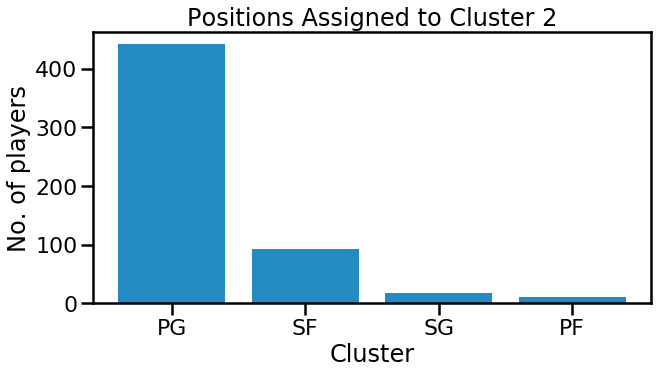

In [159]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C2_data['pos'].unique(), C2_data['pos'].value_counts(), color ='#238bc1') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 2") 
plt.show() 

In [148]:
C2_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=2
    AND pos="PG"
    ORDER BY "Raptor+/-" DESC
    """, conn)
C2_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,curryst01,Stephen Curry,2015,26,PG,GSW,10.2,GSW,80,2613,66.2,32.7,26.6,63.8,8.7,4.8,2.5,3.5,9.5,2.3,11.7,19.9,18.9,21.4,28.9,38.6,14.3,2.4,11.4,7.0,3.0,0.5,121.9,29.3,101.1,52.8,44.3,91.4,48.2,25.1,2
1,paulch01,Chris Paul,2018,32,PG,HOU,8.7,HOU,58,1847,46.7,31.8,21.6,60.4,9.1,6.3,2.2,2.6,7.6,1.1,8.6,10.6,17.0,17.8,24.5,40.9,12.5,2.3,16.7,9.5,2.6,0.6,125.9,26.1,105.0,53.2,38.0,91.9,47.5,27.7,2
2,curryst01,Stephen Curry,2014,25,PG,GSW,5.0,GSW,78,2846,71.8,36.5,24.6,61.0,8.8,4.4,1.9,3.9,7.6,0.5,8.1,16.1,17.4,18.8,28.3,39.9,16.1,1.8,10.9,6.4,2.2,0.4,116.7,29.1,103.5,50.9,42.4,88.5,44.5,25.2,2
3,conlemi01,Mike Conley,2013,25,PG,MEM,4.7,MEM,80,2757,69.6,34.5,17.2,54.9,7.2,3.3,2.9,2.8,3.2,3.9,7.1,13.9,13.3,15.2,21.0,29.5,15.1,1.8,7.9,4.8,3.4,0.7,111.4,21.7,100.2,47.6,36.2,83.0,31.2,30.0,2
4,lillada01,Damian Lillard,2018,27,PG,POR,2.7,POR,73,2670,67.6,36.6,27.4,59.4,6.7,4.5,1.5,2.9,6.6,0.3,6.9,13.3,17.0,17.7,30.6,30.9,11.1,2.6,10.6,6.6,1.4,0.8,120.1,30.9,108.8,50.1,36.1,91.6,44.5,38.0,2
5,doncilu01,Luka Don?i?,2020,20,PG,DAL,6.1,DAL,54,1799,55.6,33.3,31.3,58.4,9.5,10.1,1.4,4.6,7.7,-1.2,6.6,8.7,19.6,17.5,37.0,45.3,14.6,4.1,24.7,14.6,1.6,0.5,116.0,38.3,108.5,57.4,31.8,75.2,44.2,44.2,2
6,irvinky01,Kyrie Irving,2019,26,PG,BOS,4.4,BOS,67,2214,56.0,33.0,26.0,59.2,7.6,5.5,2.2,2.8,5.5,1.1,6.6,10.7,16.3,17.1,29.6,35.0,11.3,3.4,12.7,8.1,2.2,1.4,117.5,29.8,107.9,53.3,40.1,87.3,35.0,19.7,2
7,lillada01,Damian Lillard,2019,28,PG,POR,4.2,POR,80,2838,71.5,35.5,26.5,58.8,7.1,4.7,1.6,2.7,6.8,-0.4,6.4,13.3,15.7,15.8,29.3,30.6,10.8,2.6,11.1,7.0,1.5,1.0,121.4,29.5,112.0,49.9,36.9,91.2,41.9,33.5,2
8,conlemi01,Mike Conley,2019,31,PG,MEM,-2.7,MEM,70,2342,58.9,33.5,23.5,56.9,7.1,3.8,1.8,2.1,4.6,1.7,6.3,10.8,15.0,16.1,27.3,33.4,9.1,1.9,9.7,5.7,2.0,0.9,116.7,27.5,110.8,48.3,36.4,84.5,38.0,36.3,2
9,westbru01,Russell Westbrook,2013,24,PG,OKC,9.8,OKC,82,2861,72.1,34.9,25.7,53.2,8.2,5.8,2.3,3.7,5.4,0.8,6.2,13.0,16.0,15.2,32.8,38.4,13.2,4.8,11.8,8.6,2.6,0.6,110.6,33.4,103.1,46.6,32.3,80.0,19.5,37.5,2


# C3

Versatile Forwards

In [154]:
C3_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=3
    ORDER BY "Raptor+/-" DESC
    """, conn)
C3_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,leonaka01,Kawhi Leonard,2016,24,SF,SAS,11.3,SAS,72,2380,60.4,33.1,24.6,61.6,3.0,8.0,3.2,1.7,5.0,5.1,10.1,15.5,17.4,20.8,25.8,13.0,7.8,4.7,18.4,11.8,2.8,2.3,121.4,24.3,95.9,52.8,44.3,87.4,26.7,30.6,3
1,georgpa01,Paul George,2019,28,SF,OKC,3.3,OKC,77,2841,71.5,36.9,26.6,58.3,3.9,7.7,2.5,2.5,5.3,3.8,9.1,17.4,16.3,17.4,29.5,17.7,10.0,3.7,19.6,11.4,2.8,1.0,116.4,28.4,104.6,48.4,38.6,83.9,46.9,33.5,3
2,duranke01,Kevin Durant,2010,21,SF,OKC,3.7,OKC,82,3239,81.8,39.5,29.5,60.7,2.8,7.4,2.3,3.2,5.6,1.9,7.4,16.8,18.9,19.0,32.0,13.5,11.7,3.8,17.9,11.0,1.8,1.9,117.8,30.3,103.4,50.6,36.5,90.0,21.0,50.4,3
3,leonaka01,Kawhi Leonard,2014,22,SF,SAS,8.1,SAS,66,1923,48.7,29.1,16.6,60.2,2.6,8.1,3.2,1.6,1.7,5.0,6.7,9.3,13.2,15.4,18.3,10.4,10.3,4.6,18.9,12.1,3.0,1.9,116.4,17.7,98.2,57.9,37.9,80.2,28.2,19.5,3
4,wadedw01,Dwyane Wade,2011,29,SG,MIA,8.2,MIA,76,2823,71.4,37.1,27.2,58.1,4.9,6.8,2.8,3.3,5.5,1.1,6.7,13.6,17.1,17.7,31.6,23.5,12.4,5.5,14.4,10.2,2.1,2.4,114.0,31.3,102.0,53.4,30.6,75.8,14.9,47.1,3
5,greendr01,Draymond Green,2015,24,SF,GSW,10.2,GSW,79,2490,63.1,31.5,13.6,54.0,4.3,9.5,3.3,2.0,1.5,5.1,6.5,12.0,11.5,12.6,17.2,16.1,13.5,5.1,22.4,14.0,2.4,2.9,109.5,17.6,97.1,52.3,33.7,66.0,43.0,26.1,3
6,duranke01,Kevin Durant,2016,27,SF,OKC,7.5,OKC,72,2578,65.0,35.8,29.3,63.4,5.2,8.5,2.2,3.6,6.2,0.0,6.2,12.0,20.1,19.2,30.6,24.2,13.5,2.0,21.8,12.4,1.3,2.5,121.6,29.6,103.7,56.9,38.7,89.8,34.8,36.1,3
7,griffbl01,Blake Griffin,2017,27,PF,LAC,4.5,LAC,61,2076,52.5,34.0,23.8,56.9,5.4,9.0,1.4,2.6,4.7,1.4,6.1,9.4,15.5,14.6,28.0,24.5,10.9,6.2,20.2,13.4,1.4,0.9,115.4,28.4,107.9,51.4,33.6,76.0,11.6,43.4,3
8,anderry01,Ryan Anderson,2012,23,PF,ORL,0.9,ORL,61,1964,61.5,32.2,20.2,58.9,1.1,9.7,1.6,1.2,5.9,0.1,6.0,8.8,12.9,18.3,21.2,5.1,6.4,13.0,14.7,13.8,1.4,1.0,124.3,20.6,105.0,49.6,39.3,87.7,55.7,22.6,3
9,nowitdi01,Dirk Nowitzki,2011,32,PF,DAL,4.6,DAL,73,2504,63.5,34.3,26.5,61.2,3.0,8.1,1.3,2.2,4.1,1.9,6.0,11.1,17.1,16.1,28.2,14.2,9.1,2.4,20.8,12.0,0.8,1.4,118.4,26.2,104.8,53.8,39.3,89.2,14.2,37.6,3


In [155]:
cluster_data = C3_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.303788,8.488194,9.413770
1,AWS%,0.292305,8.640000,9.525522
2,Raptor O,0.277483,-0.660278,-0.437636
3,Raptor WAR,0.272083,1.967222,2.342015
4,Raptor+/-,0.258662,-0.834861,-0.499660
5,MPG,0.241763,23.717083,23.706443
6,MP%,0.240056,40.338472,40.354628
7,Min,0.239028,1548.658333,1551.274728
8,P/36,0.238339,14.767083,15.303426
9,AST%,0.215448,8.758194,13.661025


In [225]:
cluster_data = C3_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

fi3 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
fi3

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.303788,8.488194,9.413770
1,AWS%,0.292305,8.640000,9.525522
2,Raptor O,0.277483,-0.660278,-0.437636
3,Raptor WAR,0.272083,1.967222,2.342015
4,Raptor+/-,0.258662,-0.834861,-0.499660
5,MPG,0.241763,23.717083,23.706443
6,MP%,0.240056,40.338472,40.354628
7,Min,0.239028,1548.658333,1551.274728
8,P/36,0.238339,14.767083,15.303426
9,AST%,0.215448,8.758194,13.661025


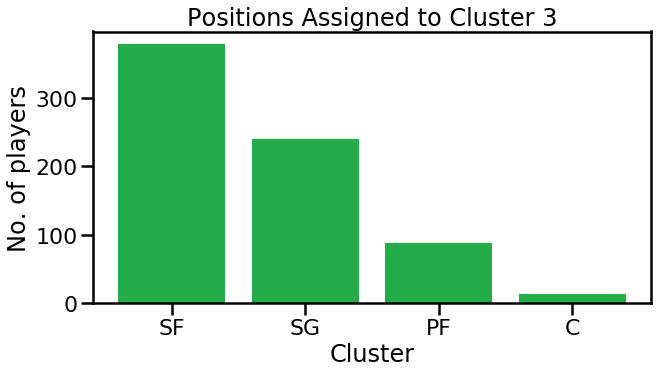

In [170]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C3_data['pos'].unique(), C3_data['pos'].value_counts(), color ='#23ac48') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 3") 
plt.show() 

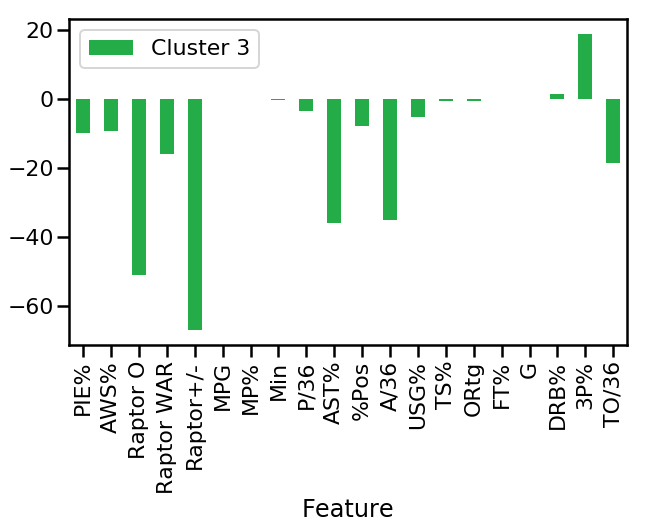

In [226]:
bar_features(fi3, 'Cluster 3', '#23ac48')

In [231]:
C3_star = data.loc[data['player_id']=='leonaka01']

cluster_data = C3_star.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)


,Feature,Importance,Cluster Average,League Average
0,ORB%,0.188498,4.6875,5.185821
1,2P%,0.136427,53.7125,48.971892
2,TRB%,0.125082,11.6500,10.058575
3,R/36,0.109200,7.8375,6.796234
4,STL%,0.095995,2.8625,1.559415
5,SB/36,0.049977,2.9250,1.963067
6,TOV%,0.035324,9.2875,13.042854
7,Raptor D,0.016637,3.1750,-0.062228
8,3PAr,0.014905,27.9125,27.469964
9,tmRtg,-0.021112,7.5375,0.019828


# C4

Doncic 1st year Raptor D high, Traditional Center?

In [167]:
C4_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=4
    ORDER BY "Raptor+/-" DESC
    """, conn)
C4_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,greendr01,Draymond Green,2016,25,PF,GSW,10.7,GSW,81,2808,70.6,34.7,14.6,58.7,7.7,9.9,3.0,3.3,4.2,5.2,9.4,17.8,13.9,13.7,18.8,29.0,21.2,5.5,23.0,14.7,2.0,3.0,114.6,20.9,99.8,53.7,38.8,69.6,31.5,40.2,4
1,jokicni01,Nikola Jokic,2016,20,C,DEN,-3.2,DEN,80,1733,43.7,21.7,17.3,58.2,4.1,12.2,2.8,2.3,3.6,4.5,8.2,9.7,14.6,16.6,19.9,18.1,13.2,11.4,24.7,17.9,2.3,2.3,118.2,20.9,104.4,54.1,33.3,81.1,14.0,31.7,4
2,duranke01,Kevin Durant,2017,28,SF,GSW,11.6,GSW,62,2070,52.3,33.4,27.1,65.1,5.2,8.9,2.9,2.4,5.2,1.7,6.9,10.3,19.4,19.3,27.8,23.1,10.4,2.2,23.6,13.6,1.5,3.8,124.7,26.4,101.3,60.8,37.5,87.5,30.4,37.4,4
3,townska01,Karl-Anthony Towns,2020,24,C,MIN,-4.1,MIN,35,1187,38.1,33.9,27.2,64.2,4.5,11.1,2.2,3.2,5.8,0.8,6.6,5.7,18.2,19.5,28.8,22.8,13.2,8.1,26.1,16.8,1.3,2.9,120.6,28.7,110.1,58.6,41.2,79.6,44.5,36.3,4
4,loveke01,Kevin Love,2014,25,PF,MIN,2.7,MIN,77,2797,70.4,36.3,26.6,59.1,4.5,12.7,1.2,2.6,5.7,0.9,6.6,13.6,20.1,21.3,28.8,21.4,10.3,8.5,29.5,18.7,1.0,1.0,120.0,28.6,104.3,50.2,37.6,82.1,35.5,44.5,4
5,nowitdi01,Dirk Nowitzki,2008,29,PF,DAL,5.0,DAL,77,2769,70.2,36.0,26.2,58.5,3.8,9.5,1.8,2.3,4.5,1.0,5.5,11.6,18.2,17.7,28.8,17.8,9.3,4.1,22.8,13.8,1.0,1.9,118.1,27.7,104.1,50.4,35.9,87.9,16.7,41.4,4
6,millspa01,Paul Millsap,2012,26,PF,UTA,0.7,UTA,64,2100,65.0,32.8,19.9,54.5,2.8,10.6,3.2,2.1,2.7,2.8,5.4,8.8,14.5,16.0,23.2,12.4,10.3,9.7,21.2,15.4,2.9,2.0,112.8,23.0,101.7,50.5,22.6,79.2,3.6,29.6,4
7,anderry01,Ryan Anderson,2011,22,PF,ORL,5.9,ORL,64,1424,35.9,22.3,18.9,59.1,1.4,9.8,1.9,1.4,4.3,1.0,5.4,5.9,12.6,17.3,20.4,6.2,7.8,10.8,18.1,14.5,1.1,2.1,122.1,19.7,101.5,50.0,39.3,81.2,65.0,22.3,4
8,garneke01,Kevin Garnett,2009,32,PF,BOS,8.2,BOS,57,1772,44.6,31.1,20.2,56.3,3.2,10.9,2.9,2.0,0.6,4.7,5.3,7.2,17.9,17.9,23.4,14.7,10.1,5.6,26.7,16.6,1.9,3.1,112.4,22.2,97.4,53.4,25.0,84.1,1.1,17.8,4
9,hilarne01,Nene,2011,28,C,DEN,5.0,DEN,75,2291,58.1,30.5,17.9,65.7,2.4,9.4,2.6,2.2,1.2,3.9,5.1,9.1,13.4,14.5,18.8,10.4,13.9,7.5,20.8,14.4,1.8,2.4,123.4,18.9,104.5,61.8,20.0,71.1,0.8,61.5,4


In [168]:
cluster_data = C4_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.295036,9.896533,9.413770
1,AWS%,0.284437,10.034489,9.525522
2,Raptor WAR,0.268915,2.032482,2.342015
3,Raptor O,0.266379,-1.089781,-0.437636
4,Raptor+/-,0.259971,-0.868613,-0.499660
5,MPG,0.251161,23.121898,23.706443
6,MP%,0.247513,39.524635,40.354628
7,Min,0.246439,1517.051095,1551.274728
8,P/36,0.227538,15.486679,15.303426
9,%Pos,0.199225,18.937774,19.028335


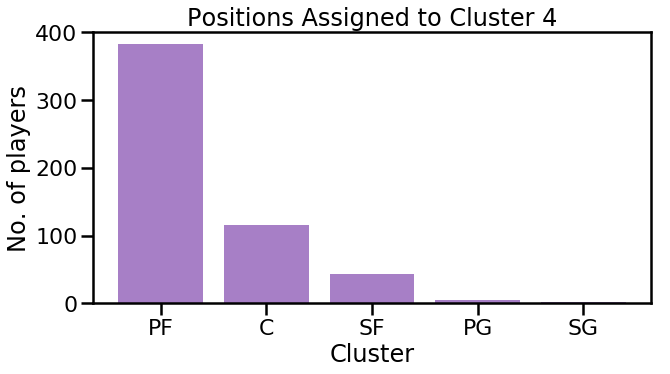

In [186]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C4_data['pos'].unique(), C4_data['pos'].value_counts(), color ='#a77fc6') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 4") 
plt.show() 

# C5

In [171]:
C5_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=5
    ORDER BY "Raptor+/-" DESC
    """, conn)
C5_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,nurkiju01,Jusuf Nurki?,2019,24,C,POR,4.2,POR,72,1974,49.7,27.4,20.7,57.0,4.3,13.8,3.2,3.1,2.1,5.2,7.2,10.1,15.0,15.2,24.7,17.9,14.6,13.4,26.7,20.2,1.7,4.2,116.3,26.1,104.8,52.3,10.3,77.3,3.5,44.2,5
1,marjabo01,Boban Marjanovic,2017,28,C,DET,-1.2,DET,35,293,7.4,8.4,24.7,60.6,1.2,16.8,2.3,1.3,3.0,3.7,6.7,1.4,20.0,24.1,25.3,5.3,6.0,16.5,32.5,24.2,1.0,3.4,127.6,25.2,103.1,54.5,0.0,81.0,0.0,43.9,5
2,goberru01,Rudy Gobert,2017,24,C,UTA,4.3,UTA,81,2744,69.5,33.9,16.3,68.1,1.4,14.8,3.8,2.1,1.2,5.6,6.7,13.1,15.7,18.8,16.7,5.7,15.0,13.6,29.5,21.8,0.9,6.4,129.1,17.6,99.2,66.2,0.0,65.3,0.2,76.2,5
3,howardw01,Dwight Howard,2011,25,C,ORL,5.9,ORL,78,2935,74.0,37.6,24.0,61.6,1.4,14.8,3.9,3.8,1.1,5.3,6.4,13.6,18.4,21.0,27.2,6.8,16.2,12.6,30.6,21.8,1.9,4.9,112.6,27.2,94.1,59.7,0.0,59.6,0.7,87.7,5
4,goberru01,Rudy Gobert,2020,27,C,UTA,3.2,UTA,62,2142,69.6,34.5,15.9,70.0,1.6,14.5,2.9,2.0,-0.3,6.6,6.3,9.8,15.2,16.8,16.1,6.5,15.2,11.3,31.3,21.8,1.1,4.8,130.2,16.7,103.2,69.8,0.0,62.1,0.0,72.5,5
5,embiijo01,Joel Embiid,2019,24,C,PHI,2.6,PHI,64,2154,54.4,33.7,29.0,59.3,3.8,14.3,2.8,3.7,2.6,3.6,6.2,9.9,19.3,17.6,33.3,18.4,13.2,8.1,34.0,21.4,1.0,4.4,113.7,32.4,104.3,53.5,30.0,80.4,21.9,54.1,5
6,goberru01,Rudy Gobert,2019,26,C,UTA,5.2,UTA,81,2577,65.2,31.8,17.9,68.2,2.2,14.5,3.5,1.8,0.8,5.1,5.9,11.4,16.9,19.9,17.8,9.6,12.1,13.2,30.2,21.9,1.2,5.8,132.9,18.3,100.3,66.9,0.0,63.6,0.0,73.3,5
7,howardw01,Dwight Howard,2010,24,C,ORL,8.1,ORL,82,2843,72.0,34.7,20.7,63.0,2.0,14.9,4.2,3.8,1.1,4.8,5.9,12.5,16.7,18.4,23.9,8.7,18.7,12.0,31.3,22.0,1.4,6.0,113.4,24.6,95.3,61.7,0.0,59.2,0.8,97.8,5
8,duncati01,Tim Duncan,2010,33,C,SAS,5.5,SAS,78,2438,61.6,31.3,22.5,56.0,4.0,12.7,2.6,2.3,1.8,4.0,5.9,10.6,18.3,19.4,26.0,17.8,10.1,10.8,26.8,18.9,1.0,3.5,115.7,26.2,100.9,52.2,18.2,72.5,1.0,34.6,5
9,davisan02,Anthony Davis,2018,24,PF,NOP,1.3,NOH,75,2727,68.3,36.4,27.7,61.2,2.3,10.9,4.0,2.1,1.5,3.8,5.4,11.4,19.0,20.3,30.0,10.8,8.6,7.7,24.8,16.5,2.0,5.6,119.0,28.4,102.3,55.8,34.0,82.8,11.1,40.9,5


In [187]:
cluster_data5 = C5_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
fi5=feature_importance(cluster_data5, league_data).reset_index().drop('index', axis=1)
feature_importance(cluster_data5, league_data).reset_index().drop('index', axis=1)

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.311762,11.686880,9.413770
1,AWS%,0.292387,13.178717,9.525522
2,Raptor WAR,0.273726,2.673469,2.342015
3,Raptor+/-,0.259535,0.168805,-0.499660
4,Raptor O,0.256942,-1.237609,-0.437636
5,MPG,0.245315,22.406414,23.706443
6,P/36,0.245018,14.760350,15.303426
7,MP%,0.242693,38.603499,40.354628
8,Min,0.236975,1490.023324,1551.274728
9,%Pos,0.218386,17.959475,19.028335


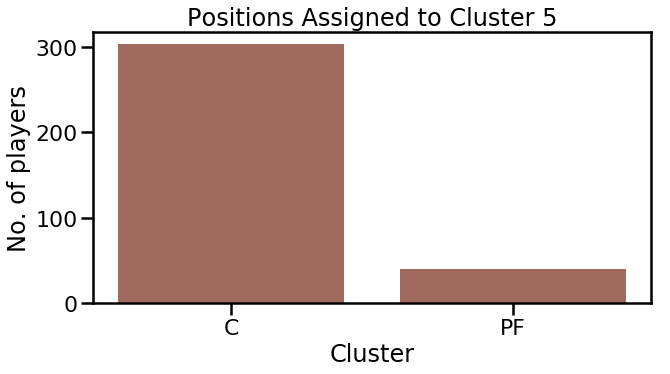

In [173]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C5_data['pos'].unique(), C5_data['pos'].value_counts(), color ='#a06a5e') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 5") 
plt.show() 

# C6

Offensive minded, 

In [174]:
C6_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=6
    ORDER BY "Raptor+/-" DESC
    """, conn)
C6_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,leonaka01,Kawhi Leonard,2015,23,SF,SAS,6.5,SAS,64,2033,50.9,31.8,20.0,56.7,3.0,8.7,3.7,1.8,3.7,5.2,8.9,12.1,15.2,17.4,23.0,13.0,9.4,4.8,20.6,12.9,3.7,1.8,112.6,22.2,96.4,51.9,34.9,80.2,23.4,30.7,6
1,leonaka01,Kawhi Leonard,2017,25,SF,SAS,7.6,SAS,74,2474,62.5,33.4,29.2,61.0,4.0,6.6,2.9,2.4,6.6,1.7,8.3,13.9,18.4,20.3,31.1,18.9,9.1,3.7,15.7,9.8,2.7,1.8,120.6,29.6,101.4,52.9,38.0,88.0,29.5,40.6,6
2,duranke01,Kevin Durant,2013,24,SF,OKC,9.8,OKC,81,3119,78.6,38.5,28.2,64.7,4.6,7.9,2.7,3.5,6.7,1.0,7.7,16.6,20.6,20.4,29.8,21.7,13.7,1.8,20.3,11.8,1.9,2.6,122.2,28.8,100.3,53.9,41.6,90.5,23.3,52.3,6
3,duranke01,Kevin Durant,2014,25,SF,OKC,6.6,OKC,81,3122,78.8,38.5,31.3,63.5,5.4,7.2,2.0,3.4,7.6,-0.6,7.1,16.0,21.3,21.2,33.0,26.7,12.2,2.2,18.6,10.8,1.7,1.5,122.6,32.0,103.4,54.9,39.1,87.3,29.1,47.7,6
4,bryanko01,Kobe Bryant,2008,29,SG,LAL,7.6,LAL,82,3192,80.7,38.9,27.4,57.6,5.2,6.1,2.3,3.0,5.8,1.3,7.1,16.0,16.1,15.8,31.4,23.9,11.3,3.4,14.1,9.0,2.4,0.9,115.0,30.6,104.8,49.0,36.1,84.0,24.6,43.9,6
5,oladivi01,Victor Oladipo,2018,25,SG,IND,1.4,IND,75,2552,64.6,34.0,25.5,57.7,4.7,5.7,3.4,3.2,3.3,3.5,6.9,12.7,14.9,15.3,30.1,21.2,12.7,2.1,15.1,8.6,3.5,2.0,109.5,29.3,104.2,52.8,37.1,79.9,32.3,27.4,6
6,greenda02,Danny Green,2015,27,SG,SAS,6.5,SAS,81,2312,57.9,28.5,15.7,59.6,2.6,5.7,3.1,1.5,3.1,3.0,6.1,10.4,10.6,13.4,17.5,10.3,10.5,2.7,13.9,8.4,2.2,2.8,114.1,16.7,100.5,46.6,41.8,87.4,61.9,17.2,6
7,willilo02,Lou Williams,2017,30,SG,LAL,-7.0,LAL,58,1403,35.6,24.2,28.1,60.9,4.8,3.4,2.0,3.1,7.6,-1.8,5.8,6.2,15.0,15.5,30.6,22.3,11.9,1.1,9.5,5.1,2.3,0.6,117.6,29.7,113.8,48.9,38.5,88.4,43.2,46.9,6
8,hardeja01,James Harden,2012,22,SG,OKC,6.5,OKC,62,1946,60.8,31.4,20.8,66.0,4.6,5.0,1.5,2.7,6.9,-1.2,5.7,8.4,14.1,15.1,21.6,19.3,14.8,1.9,12.2,7.4,1.6,0.6,125.4,21.5,105.5,57.9,39.0,84.6,46.4,58.7,6
9,georgpa01,Paul George,2014,23,SF,IND,4.7,IND,80,2898,73.3,36.2,23.3,55.5,3.8,7.3,2.3,3.0,2.6,2.9,5.6,12.4,15.6,16.2,28.3,17.9,12.5,2.6,17.7,10.5,2.7,0.6,107.3,27.3,97.0,45.8,36.4,86.4,36.7,34.1,6


In [229]:
data.loc[data['player_id']=='leonaka01']

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
9,leonaka01,Kawhi Leonard,2016,24,SF,SAS,11.3,SAS,72,2380,60.4,33.1,24.6,61.6,3.0,8.0,3.2,1.7,5.0,5.1,10.1,15.5,17.4,20.8,25.8,13.0,7.8,4.7,18.4,11.8,2.8,2.3,121.4,24.3,95.9,52.8,44.3,87.4,26.7,30.6,3
17,leonaka01,Kawhi Leonard,2020,28,SF,LAC,6.4,LAC,51,1643,53.2,32.2,29.5,58.5,5.5,8.0,2.6,3.0,5.9,3.4,9.3,10.1,19.3,19.1,33.2,27.0,10.7,3.3,19.7,11.7,2.6,1.7,116.3,32.4,103.7,51.0,36.6,88.9,28.7,34.4,0
24,leonaka01,Kawhi Leonard,2015,23,SF,SAS,6.5,SAS,64,2033,50.9,31.8,20.0,56.7,3.0,8.7,3.7,1.8,3.7,5.2,8.9,12.1,15.2,17.4,23.0,13.0,9.4,4.8,20.6,12.9,3.7,1.8,112.6,22.2,96.4,51.9,34.9,80.2,23.4,30.7,6
31,leonaka01,Kawhi Leonard,2017,25,SF,SAS,7.6,SAS,74,2474,62.5,33.4,29.2,61.0,4.0,6.6,2.9,2.4,6.6,1.7,8.3,13.9,18.4,20.3,31.1,18.9,9.1,3.7,15.7,9.8,2.7,1.8,120.6,29.6,101.4,52.9,38.0,88.0,29.5,40.6,6
63,leonaka01,Kawhi Leonard,2014,22,SF,SAS,8.1,SAS,66,1923,48.7,29.1,16.6,60.2,2.6,8.1,3.2,1.6,1.7,5.0,6.7,9.3,13.2,15.4,18.3,10.4,10.3,4.6,18.9,12.1,3.0,1.9,116.4,17.7,98.2,57.9,37.9,80.2,28.2,19.5,3
120,leonaka01,Kawhi Leonard,2019,27,SF,TOR,6.0,TOR,60,2040,51.3,34.0,28.1,60.6,3.5,7.7,2.3,2.1,4.7,0.7,5.4,8.5,17.8,18.5,30.3,16.4,8.4,4.2,18.6,11.6,2.5,1.0,119.5,28.7,105.2,54.2,37.1,85.4,26.7,37.7,3
289,leonaka01,Kawhi Leonard,2013,21,SF,SAS,6.7,SAS,58,1810,45.5,31.2,14.5,59.2,2.0,7.3,2.7,1.3,1.0,2.9,3.9,6.1,11.5,13.5,16.4,7.7,9.6,4.3,17.1,11.1,2.7,1.3,114.4,15.7,99.4,55.4,37.4,82.5,33.1,24.0,3
469,leonaka01,Kawhi Leonard,2012,20,SF,SAS,7.7,SAS,64,1534,48.1,24.0,12.8,57.3,1.8,8.3,2.8,1.1,1.6,1.4,3.0,4.5,10.8,13.8,14.5,6.6,9.0,7.9,16.4,12.2,2.9,1.1,118.9,14.5,100.5,53.6,37.6,77.3,27.0,21.8,3


In [175]:
cluster_data = C6_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

features6 = feature_importance(cluster_data, league_data).reset_index().drop('index', axis=1)
features6

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.289055,7.700820,9.413770
1,AWS%,0.276475,7.980055,9.525522
2,Raptor WAR,0.267917,2.236885,2.342015
3,Raptor O,0.260150,-0.027596,-0.437636
4,Raptor+/-,0.253697,-0.550000,-0.499660
5,P/36,0.242689,14.983743,15.303426
6,MP%,0.226915,41.209563,40.354628
7,MPG,0.226456,24.167077,23.706443
8,Min,0.225248,1583.790984,1551.274728
9,%Pos,0.221130,17.269399,19.028335


In [204]:
cluster_data6 = C6_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

fi6 = feature_importance(cluster_data6, league_data).reset_index().drop('index', axis=1)
fi6

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.289055,7.700820,9.413770
1,AWS%,0.276475,7.980055,9.525522
2,Raptor WAR,0.267917,2.236885,2.342015
3,Raptor O,0.260150,-0.027596,-0.437636
4,Raptor+/-,0.253697,-0.550000,-0.499660
5,P/36,0.242689,14.983743,15.303426
6,MP%,0.226915,41.209563,40.354628
7,MPG,0.226456,24.167077,23.706443
8,Min,0.225248,1583.790984,1551.274728
9,%Pos,0.221130,17.269399,19.028335


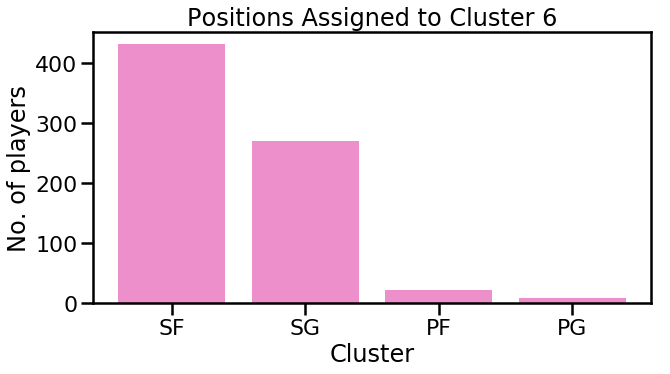

In [176]:
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 

plt.bar(C6_data['pos'].unique(), C6_data['pos'].value_counts(), color ='#ed8fcb') 
  
plt.xlabel("Cluster") 
plt.ylabel("No. of players") 
plt.title("Positions Assigned to Cluster 6") 
plt.show() 

In [220]:
fi6['Difference']=(fi6['Cluster Average']-fi6['League Average'])/np.absolute(fi6['League Average'])*100
fi6

,Feature,Importance,Cluster Average,League Average,Difference
0,PIE%,0.289055,7.700820,9.413770,-18.196224
1,AWS%,0.276475,7.980055,9.525522,-16.224488
2,Raptor WAR,0.267917,2.236885,2.342015,-4.488840
3,Raptor O,0.260150,-0.027596,-0.437636,93.694390
4,Raptor+/-,0.253697,-0.550000,-0.499660,-10.074915
5,P/36,0.242689,14.983743,15.303426,-2.088960
6,MP%,0.226915,41.209563,40.354628,2.118555
7,MPG,0.226456,24.167077,23.706443,1.943074
8,Min,0.225248,1583.790984,1551.274728,2.096099
9,%Pos,0.221130,17.269399,19.028335,-9.243772


In [224]:
def bar_features (fi,cluster,color):
    fi['Difference']=(fi['Cluster Average']-fi['League Average'])/np.absolute(fi['League Average'])*100
    plt.rcParams['figure.figsize'] = [10, 6]
    plotdata = pd.DataFrame(
    {cluster: list(fi['Difference'])}, 
    index=fi['Feature'])
    plotdata.plot(kind='bar', color =color);

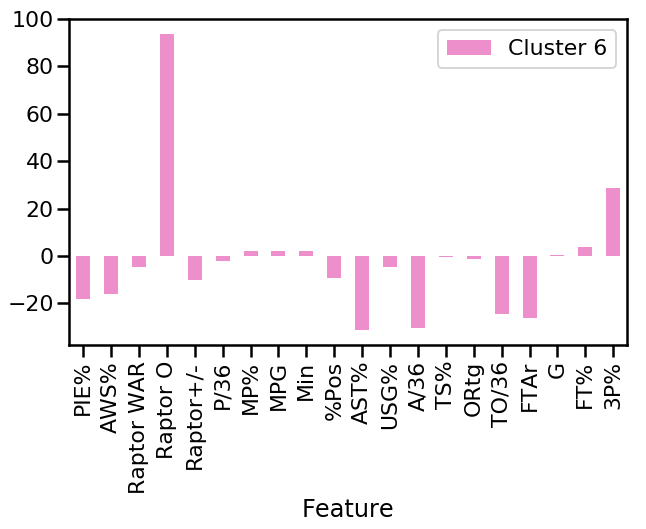

In [223]:
plt.rcParams['figure.figsize'] = [10, 6]
plotdata = pd.DataFrame(
    {'Cluster 6': list(fi6['Difference'])}, 
    index=fi6['Feature'])
plotdata.plot(kind='bar', color ='#ed8fcb');

# C7

Floor General CP3

In [177]:
C7_data = pd.read_sql(
    """
    SELECT * FROM CLUSTERS_3
    WHERE Cluster=7
    ORDER BY "Raptor+/-" DESC
    """, conn)
C7_data.head(50)

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr,Cluster
0,paulch01,Chris Paul,2009,23,PG,NOH,1.8,NOH,78,3002,76.0,38.5,24.3,59.9,11.8,5.9,3.1,3.2,8.7,3.9,12.7,23.6,21.9,24.2,27.5,54.5,13.5,2.8,14.6,8.7,3.9,0.3,124.4,30.0,103.1,52.5,36.4,86.8,14.0,41.8,7
1,paulch01,Chris Paul,2014,28,PG,LAC,7.2,LAC,62,2171,55.0,35.0,20.5,58.0,11.5,4.6,2.7,2.5,7.1,3.9,11.0,15.3,18.2,19.8,23.7,48.9,12.4,2.0,11.4,6.9,3.5,0.1,124.6,26.0,103.2,49.8,36.8,85.5,24.4,39.7,7
2,paulch01,Chris Paul,2015,29,PG,LAC,6.9,LAC,82,2857,72.4,34.8,20.8,59.6,11.2,5.0,2.3,2.5,8.5,2.1,10.6,19.4,18.2,19.7,23.7,47.4,12.7,2.1,12.5,7.4,2.8,0.4,125.6,25.9,104.9,52.3,39.8,90.0,29.8,27.4,7
3,paulch01,Chris Paul,2012,26,PG,LAC,2.8,LAC,60,2181,68.3,36.4,22.0,58.1,10.1,3.9,2.9,2.3,8.1,1.9,10.0,14.2,19.1,21.7,24.3,43.8,10.8,2.3,9.4,5.8,3.8,0.2,126.1,25.8,104.5,51.1,37.1,86.1,23.9,33.9,7
4,paulch01,Chris Paul,2008,22,PG,NOH,5.8,NOH,80,3006,75.9,37.6,22.4,57.6,12.3,4.3,2.9,2.7,8.7,1.1,9.8,19.2,19.2,21.4,25.7,52.2,12.1,2.4,10.3,6.2,3.9,0.1,124.7,28.2,103.4,51.6,36.9,85.1,19.3,30.2,7
5,paulch01,Chris Paul,2013,27,PG,LAC,7.1,LAC,70,2335,59.2,33.4,20.1,59.4,11.5,4.4,3.0,2.7,7.9,1.4,9.3,14.3,18.9,21.0,22.6,46.5,13.7,2.8,10.5,6.7,3.8,0.4,127.0,25.0,102.4,53.8,32.8,88.5,27.1,37.7,7
6,paulch01,Chris Paul,2016,30,PG,LAC,4.4,LAC,74,2420,61.0,32.7,22.5,57.5,11.5,4.8,2.6,3.0,7.5,1.6,9.0,14.6,18.9,20.0,27.1,52.7,13.4,1.8,12.0,7.0,3.1,0.4,119.2,29.4,102.9,50.1,37.1,89.6,29.5,29.4,7
7,paulch01,Chris Paul,2017,31,PG,LAC,4.5,LAC,61,1921,48.6,31.5,21.5,61.4,11.0,5.9,2.5,2.9,7.5,1.4,8.9,11.4,18.2,19.7,24.4,46.8,14.0,2.4,15.0,8.8,3.1,0.3,126.0,26.8,106.0,51.8,41.1,89.2,38.5,33.1,7
8,paulch01,Chris Paul,2011,25,PG,NOH,1.0,NOH,80,2880,72.6,36.0,17.9,57.8,11.0,4.6,2.7,2.5,6.4,2.5,8.9,17.1,17.6,20.1,21.1,45.8,13.9,1.6,12.3,6.9,3.5,0.1,122.2,23.3,103.1,48.2,38.8,87.8,19.7,41.4,7
9,jamesle01,LeBron James,2020,35,PG,LAL,7.3,LAL,60,2094,69.0,34.9,26.3,58.2,10.8,8.1,1.8,4.1,6.7,1.0,7.7,11.2,20.1,19.0,31.6,49.7,15.3,3.1,21.0,12.3,1.7,1.3,116.6,33.4,105.4,57.0,34.9,69.7,32.4,29.2,7


In [199]:
cluster_data7 = C7_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)
league_data = data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos', 'Cluster'], axis=1)

fi7 = feature_importance(cluster_data7, league_data).reset_index().drop('index', axis=1)
fi7

,Feature,Importance,Cluster Average,League Average
0,PIE%,0.275623,11.602518,9.413770
1,AWS%,0.267554,10.751799,9.525522
2,Raptor WAR,0.257350,3.674820,2.342015
3,Raptor+/-,0.254816,0.628417,-0.499660
4,Raptor O,0.250060,1.230576,-0.437636
5,AST%,0.231623,35.671223,13.661025
6,MPG,0.223624,26.740288,23.706443
7,MP%,0.221616,44.620144,40.354628
8,Min,0.217190,1713.115108,1551.274728
9,P/36,0.207904,16.000719,15.303426


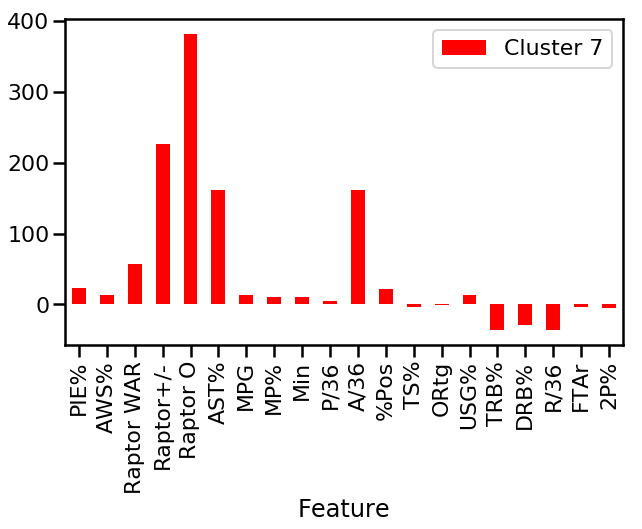

In [230]:
bar_features(fi7,'Cluster 7','red')

In [39]:
C_data.shape

(858, 41)

In [40]:
data = C_data.drop(['player_id', 'name_common', 'year_id', 'team_id', 'franch_id', 'pos'], axis=1)

In [41]:
X = data.drop(['Cluster'], axis=1)
y = data['Cluster']

In [42]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [43]:
X.head()

,age,tmRtg,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
0,20,-3.2,80,1733,43.7,21.7,17.3,58.2,4.1,12.2,2.8,2.3,3.6,4.5,8.2,9.7,14.6,16.6,19.9,18.1,13.2,11.4,24.7,17.9,2.3,2.3,118.2,20.9,104.4,54.1,33.3,81.1,14.0,31.7
1,23,4.0,80,2504,63.5,31.3,23.6,58.9,8.5,12.7,2.4,3.6,5.6,1.8,7.4,13.0,19.2,19.0,27.4,37.0,15.4,9.8,27.6,18.7,2.1,1.9,119.0,29.4,104.7,56.9,30.7,82.1,22.4,29.2
2,25,-1.3,56,1850,46.8,33.0,27.4,59.7,4.1,12.7,4.2,2.1,4.1,3.3,7.4,9.6,19.7,21.0,29.5,19.0,8.4,9.9,27.5,18.8,2.2,6.0,122.0,29.0,105.0,54.7,33.1,79.4,14.1,42.2
3,21,0.5,73,2038,51.6,27.9,21.9,64.0,6.5,12.9,2.1,3.1,6.4,0.9,7.3,10.6,17.7,18.1,23.5,28.8,15.2,11.6,27.2,19.5,1.5,2.1,125.7,24.9,109.4,62.8,32.4,82.5,16.3,26.7
4,24,4.2,72,1974,49.7,27.4,20.7,57.0,4.3,13.8,3.2,3.1,2.1,5.2,7.2,10.1,15.0,15.2,24.7,17.9,14.6,13.4,26.7,20.2,1.7,4.2,116.3,26.1,104.8,52.3,10.3,77.3,3.5,44.2


## Dimensionality Reduction

In [44]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.4335053364414816


In [45]:
LDA = LinearDiscriminantAnalysis(n_components=2, 
                                 shrinkage='auto', 
                                 solver='eigen')

In [47]:
LDA_reduced_df = LDA.fit(X_scaled,y).transform(X_scaled)
LDA.score(X_scaled,y)

0.916083916083916

In [48]:
def kmeans(reduced_data, n_clusters):
    """
    performs kmeans clustering and returns labels, centroids, inertia, and silhouette score
    """
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    kmeans = kmeans.fit(reduced_data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    sil_score = metrics.silhouette_score(reduced_data, kmeans.labels_, metric='euclidean')

    data_dictionary = {
        "labels": labels,
        "centroids": centroids,
        "inertia" : inertia,
        "silhouette_score": sil_score
    }

    return data_dictionary

In [49]:
def find_best_cluster(data,a,b):
    """
    plots and finds the best silhouette score for range(a,b)
    """
    scores = []
    for i in range(a,b):
        i_clusters = kmeans(data, i)
        sil_score_i = i_clusters['silhouette_score']
        scores.append(sil_score_i)
        print(i, sil_score_i)

    sns.set_context('poster', font_scale=1)
    plt.plot(range(a,b), scores)
    plt.title("""Measuring Silhouette Score to Find Best Cluster""")
    plt.show

In [50]:
def plot_kmeans_cluster(reduced_data, k_clusters, plot_title):
    kmeans = KMeans(init='k-means++', n_clusters=k_clusters, n_init=10)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(15,10))
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.get_cmap("tab20"),
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=10)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    plt.title(plot_title)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

5 0.38510893857149686
6 0.36290561231170204
7 0.35723958510946646
8 0.3621060841641658
9 0.3629162202228582
10 0.36211508835079614
11 0.3546782544289001
12 0.3460464081357596
13 0.33972505363564015
14 0.3311466941112058


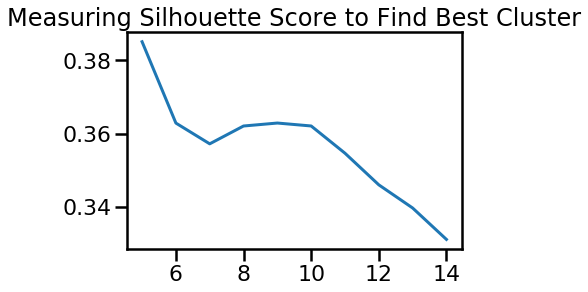

In [59]:
from sklearn import cluster, metrics, datasets
find_best_cluster(LDA_reduced_df,5,15)

In [63]:
k_means = kmeans(LDA_reduced_df, 9)
# Assign labels
data['Cluster'] = k_means['labels']
C_data['Cluster_new'] = k_means['labels']

# Print silhouette score
print ("silhouette score:", k_means['silhouette_score'])

silhouette score: 0.3629162202228582


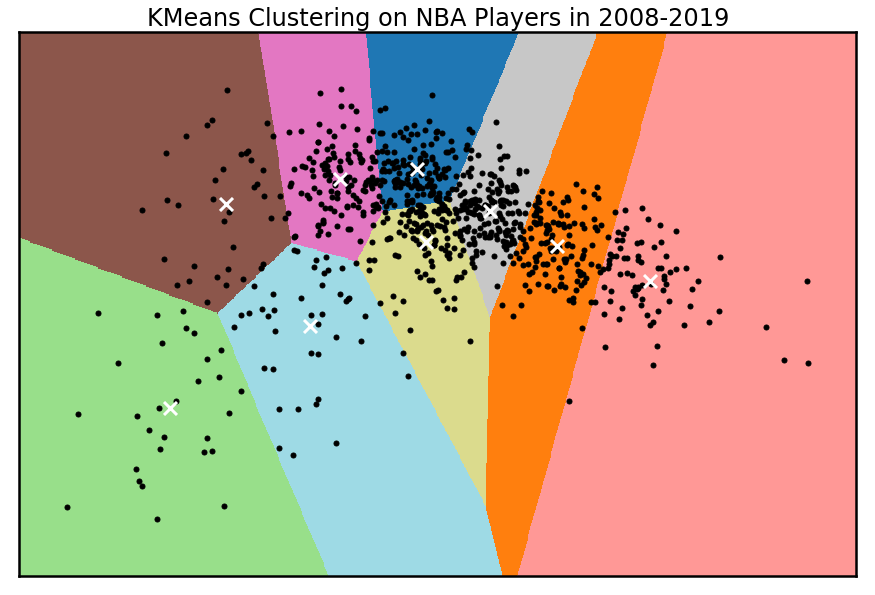

In [64]:
# Target labels
y = k_means['labels']
df = pd.DataFrame({'X1':LDA_reduced_df[:,0],
                   'X2':LDA_reduced_df[:,1], 
                   'labels':y})

plot_kmeans_cluster(LDA_reduced_df, k_clusters=9, 
                    plot_title="""KMeans Clustering on NBA Players in 2008-2019""")

In [65]:
C_data['Cluster_new'].value_counts()

0    158
8    140
7    135
2    126
4    116
3     74
6     43
1     37
5     29
Name: Cluster_new, dtype: int64

In [66]:
def feature_importance(cluster_data, league_data):
    """
    takes reduced data,
    performs Principal Component Analysis,
    returns feature importance dataframe
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(cluster_data)

    pca = PCA(n_components=2)
    PCA_reduced_df = pca.fit(scaled_data).transform(scaled_data)

    features = pd.DataFrame(zip(cluster_data.columns, pca.components_[0], np.mean(cluster_data), np.mean(league_data)),
        columns=['Feature', 'Importance', 'Cluster Average', 'League Average']).sort_values('Importance', ascending=False).head(10)

    return features